In [5]:
info_dir_name = '/home/gabi/diplomka/neurips/paper/regressors/orig/'
arch_dir_name = '/home/gabi/diplomka/neurips/paper/regressors/arch2vec/'
ref_dir_name = '/home/gabi/diplomka/neurips/paper/regressors/ref/'

In [7]:
import os

os.listdir(arch_dir_name)

['rf_10000_0_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_1_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_2_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_3_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_4_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_5_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_6_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_7_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_8_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_10000_9_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_1000_0_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_1000_1_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_1000_2_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_1000_3_any_features-original_training_arch2vec_epochs-8.pt',
 'rf_1000_4_any_features-original_training_arch2vec_epochs-8.pt',


In [6]:
def process_res_dict(path, seed, n_train, any_or_train, model):
    with open(os.path.join(path, 'Test features - validation accuracy_metrics.txt'), 'r') as f:
        res_dict = {}
        for l in f:
            l = l.split(': ')
            key = l[0]
            val = l[1].replace('(', '').replace(')', '').split(', ')[0]

            res_dict[key] = float(val)
            
        res_dict['model'] = model
        res_dict['n_train'] = n_train
        res_dict['seed'] = seed
        res_dict['any_or_train'] = any_or_train
    
    return res_dict

In [12]:
import glob

res_df = []

for seed in range(0, 10):
    for n_train in [100, 250, 600, 1000, 10000]:
        for any_or_train in ['any', 'train']:
            for dir_path, model_id, model_name in zip(
                [info_dir_name, ref_dir_name, arch_dir_name],
                ['features_model_orig_epoch-29', 'features_model_ref_epoch-29', 'features-original_training_arch2vec_epochs-8'],
                ['info-NAS', 'reference arch2vec', 'arch2vec']
            ): 
                p = os.path.join(dir_path, f'rf_{n_train}_{seed}_{any_or_train}_{model_id}.pt')

                try:
                    res = process_res_dict(p, seed, n_train, any_or_train, model_name)
                except FileNotFoundError:
                    print(f"Skipping file: {p}")
                    continue
                res_df.append(res)

Skipping file: /home/gabi/diplomka/neurips/paper/regressors/orig/rf_1000_0_train_features_model_orig_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/ref/rf_1000_0_train_features_model_ref_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/arch2vec/rf_1000_0_train_features-original_training_arch2vec_epochs-8.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/orig/rf_10000_0_train_features_model_orig_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/ref/rf_10000_0_train_features_model_ref_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/arch2vec/rf_10000_0_train_features-original_training_arch2vec_epochs-8.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/orig/rf_1000_1_train_features_model_orig_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors/ref/rf_1000_1_train_features_model_ref_epoch-29.pt
Skipping file: /home/gabi/diplomka/neurips/paper/regressors

In [13]:
len(res_df)

240

In [15]:
res_df[0]

{'RMSE': 0.016965448802638207,
 "Pearson's r": 0.6614018556685132,
 'model': 'info-NAS',
 'n_train': 100,
 'seed': 0,
 'any_or_train': 'any'}

In [24]:
import pandas as pd

res_dfs = pd.DataFrame(res_df)
res_dfs = res_dfs[res_dfs['any_or_train'] == 'any']
results_table = res_dfs.groupby(
    ['n_train', 'any_or_train', 'model']).agg({'RMSE': ['mean', 'std', 'min'], "Pearson's r": ['mean', 'std', 'max']})

print(results_table.to_latex())

\begin{tabular}{lllrrrrrr}
\toprule
      &     &                    & \multicolumn{3}{l}{RMSE} & \multicolumn{3}{l}{Pearson's r} \\
      &     &                    &      mean &       std &       min &        mean &       std &       max \\
n\_train & any\_or\_train & model &           &           &           &             &           &           \\
\midrule
100   & any & arch2vec &  0.029400 &  0.007339 &  0.017721 &    0.420036 &  0.090001 &  0.622351 \\
      &     & info-NAS &  0.024366 &  0.006020 &  0.016053 &    0.549939 &  0.094207 &  0.707159 \\
      &     & reference arch2vec &  0.024840 &  0.007638 &  0.016339 &    0.546334 &  0.105162 &  0.701090 \\
250   & any & arch2vec &  0.031368 &  0.019856 &  0.019858 &    0.496913 &  0.084852 &  0.622645 \\
      &     & info-NAS &  0.025194 &  0.008543 &  0.017494 &    0.613769 &  0.058597 &  0.679845 \\
      &     & reference arch2vec &  0.024080 &  0.005407 &  0.018093 &    0.600980 &  0.059510 &  0.685465 \\
600   & any & arc

In [25]:
results_table

RMSE                      \
                                             mean       std       min   
n_train any_or_train model                                              
100     any          arch2vec            0.029400  0.007339  0.017721   
                     info-NAS            0.024366  0.006020  0.016053   
                     reference arch2vec  0.024840  0.007638  0.016339   
250     any          arch2vec            0.031368  0.019856  0.019858   
                     info-NAS            0.025194  0.008543  0.017494   
                     reference arch2vec  0.024080  0.005407  0.018093   
600     any          arch2vec            0.030044  0.007140  0.021959   
                     info-NAS            0.027351  0.005736  0.020101   
                     reference arch2vec  0.027588  0.004912  0.022059   
1000    any          arch2vec            0.029508  0.005440  0.022549   
                     info-NAS            0.027381  0.003550  0.022602   
                     reference arch2vec  0.028112  0.003631  0.022964   
10000   any          arch2vec            0.026476  0.002199  0.023900   
                     info-NAS            0.026803  0.001885  0.025197   
                     reference arch2vec  0.026738  0.001488  0.025038   

                                        Pearson's r                      
                                               mean       std       max  
n_train any_or_train model                                               
100     any          arch2vec              0.420036  0.090001  0.622351  
                     info-NAS              0.549939  0.094207  0.707159  
                     reference arch2vec    0.546334  0.105162  0.701090  
250     any          arch2vec              0.496913  0.084852  0.622645  
                     info-NAS              0.613769  0.058597  0.679845  
                     reference arch2vec    0.600980  0.059510  0.685465  
600     any          arch2vec              0.516857  0.070322  0.613287  
                     info-NAS              0.616333  0.060642  0.680181  
                     reference arch2vec    0.595792  0.051826  0.670538  
1000    any          arch2vec              0.541995  0.050037  0.645191  
                     info-NAS              0.615601  0.040604  0.665890  
                     reference arch2vec    0.597132  0.038458  0.652191  
10000   any          arch2vec              0.642178  0.019017  0.664410  
                     info-NAS              0.648227  0.015022  0.670988  
                     reference arch2vec    0.640640  0.012234  0.663772

In [30]:
import numpy as np

def ci_95(std, sample_size):
    return 1.96 * std / np.sqrt(sample_size)

In [31]:
ci_95(results_table['Pearson\'s r']['std'], 10)

n_train  any_or_train  model             
100      any           arch2vec              0.055783
                       info-NAS              0.058390
                       reference arch2vec    0.065180
250      any           arch2vec              0.052592
                       info-NAS              0.036319
                       reference arch2vec    0.036885
600      any           arch2vec              0.043586
                       info-NAS              0.037586
                       reference arch2vec    0.032122
1000     any           arch2vec              0.031013
                       info-NAS              0.025167
                       reference arch2vec    0.023837
10000    any           arch2vec              0.011787
                       info-NAS              0.009311
                       reference arch2vec    0.007583
Name: std, dtype: float64

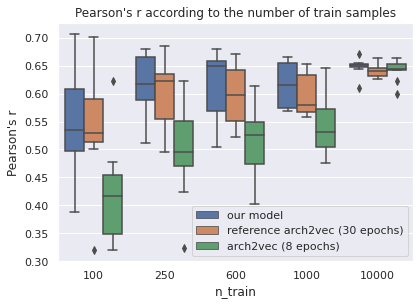

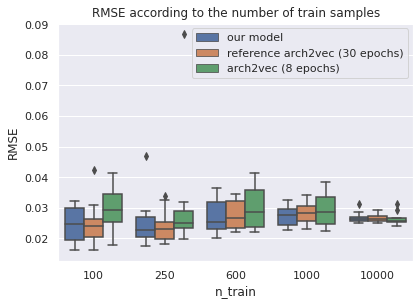

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = pd.DataFrame(res_df)
plot_df = plot_df[plot_df['any_or_train'] == 'any']

sns.set()

def set_bs(ax):
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles=handles[1:], labels=labels[1:])
    leg = ax.get_legend()
    leg.set_title(None)
    new_labels = ['our model', 'reference arch2vec (30 epochs)', 'arch2vec (8 epochs)']
    for t, l in zip(leg.texts, new_labels):
        t.set_text(l)

save_path = '/home/gabi/diplomka/neurips/paper/diplomka_to_neurips/img/'

plt.figure(figsize=(6,4.4))
ax = sns.boxplot(data=plot_df, y='Pearson\'s r', x='n_train', hue='model')
set_bs(ax)
plt.title("Pearson's r according to the number of train samples")
plt.tight_layout()
plt.savefig(os.path.join(save_path, f"pearson.png"), dpi=500)
plt.show()

plt.figure(figsize=(6,4.4))
ax = sns.boxplot(data=plot_df, y='RMSE', x='n_train', hue='model')
plt.tight_layout()
set_bs(ax)
plt.title("RMSE according to the number of train samples")
plt.tight_layout()
plt.savefig(os.path.join(save_path, f"rmse.png"), dpi=500)
plt.show()